In [1]:
#import necessary libraries
import numpy as np
from matplotlib import pylab as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn_extra.cluster import KMedoids

In [2]:
#load in the data
data = np.load("mds-population.npz")

In [3]:
#create two lists to store the iterations and stress values from running MDS on the data matrix
stress_values = []
iteration =[]
for i in range(1,43):
    mds_obj = MDS(n_components=i, dissimilarity='precomputed')
    mds_data = mds_obj.fit_transform(data['D'])
    stress_values.append(mds_obj.stress_)
    iteration.append(i)

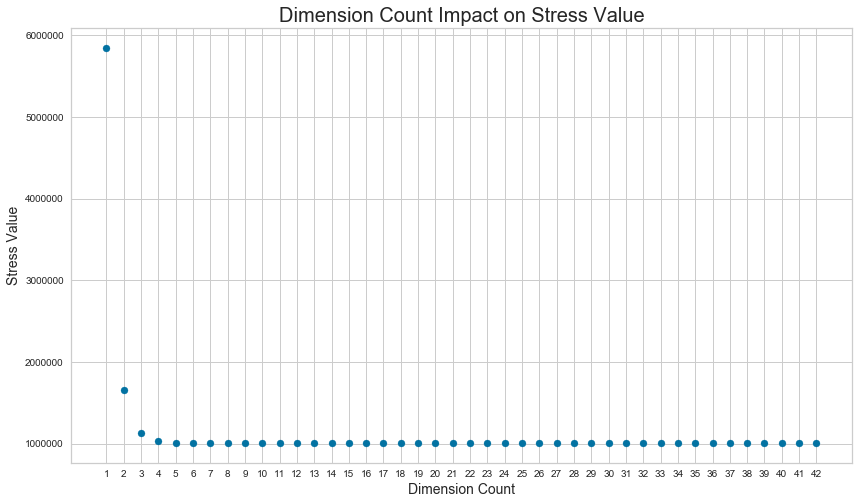

In [4]:
#display a scatter plot of the stress values for each number of dimensions tests
fig = plt.figure(figsize=(14,8))
plt.scatter(iteration,stress_values)
plt.xlabel("Dimension Count",fontsize = 14)
plt.xticks(iteration)
plt.ylabel("Stress Value",fontsize = 14)
plt.title("Dimension Count Impact on Stress Value", fontsize = 20)
plt.show()

In [5]:
#create an MDS object with 2 dimensions
mds_obj = MDS(n_components=2, dissimilarity='precomputed')
mds_data = mds_obj.fit_transform(data['D'])

In [6]:
#store the values from each dimension and created decoded population list labels 
x = mds_data[:,0]
y = mds_data[:,1]
population_labels = data['population_list']
decoded_labels = []

for label in population_labels:
    decoded_label = label.decode('utf-8')
    decoded_labels.append(decoded_label)
population_labels = decoded_labels

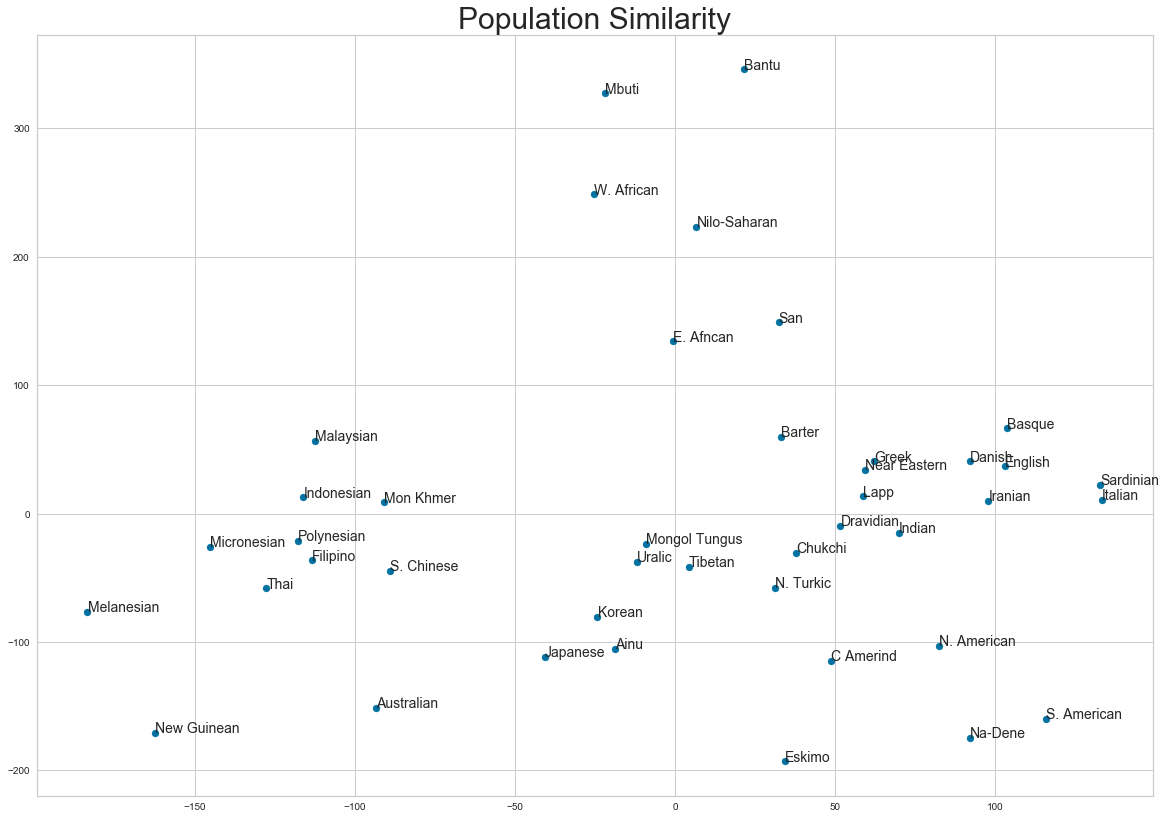

In [7]:
#display a scatter plot of the different populations in the list and their similarities to one another
fig = plt.figure(figsize=(20,14))
plt.scatter(x,y)
plt.title("Population Similarity", fontsize = 30)

for i, text in enumerate(population_labels):
    plot_text = plt.annotate(text, (x[i]+.03, y[i]+.03))
    plot_text.set_fontsize(14)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9A748D408>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

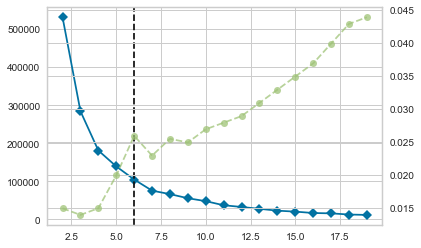

In [8]:
#import KElbowVisualizer from scikit's yellowbrick (downloaded to streamline optimal k selection)
#the function will determine optimal k and provide a score with distortion metric
kmeans = KMeans(random_state=0)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2,20))
elbow_visualizer.fit(mds_data)

In [9]:
#print results from elbow visualizer
print('Elbow value =',elbow_visualizer.elbow_value_)

Elbow value = 6


In [10]:
#store the optimal number of clusters and create a kmeans object with that number of clusters
num_clusters = elbow_visualizer.elbow_value_
kmeans = KMeans(n_clusters=num_clusters,random_state=0 ).fit(mds_data)

In [11]:
# create a vector to assign a corresponding color label to each of the unique labels
class_colors = kmeans.labels_
class_colors = np.where(class_colors == 0, 'r', class_colors)
class_colors = np.where(class_colors == '1', 'g', class_colors)
class_colors = np.where(class_colors == '2', 'b', class_colors)
class_colors = np.where(class_colors == '3', 'y', class_colors)
class_colors = np.where(class_colors == '4', 'm', class_colors)
class_colors = np.where(class_colors == '5', 'k', class_colors)
#class_colors = np.where(class_colors == '6', 'c', class_colors)

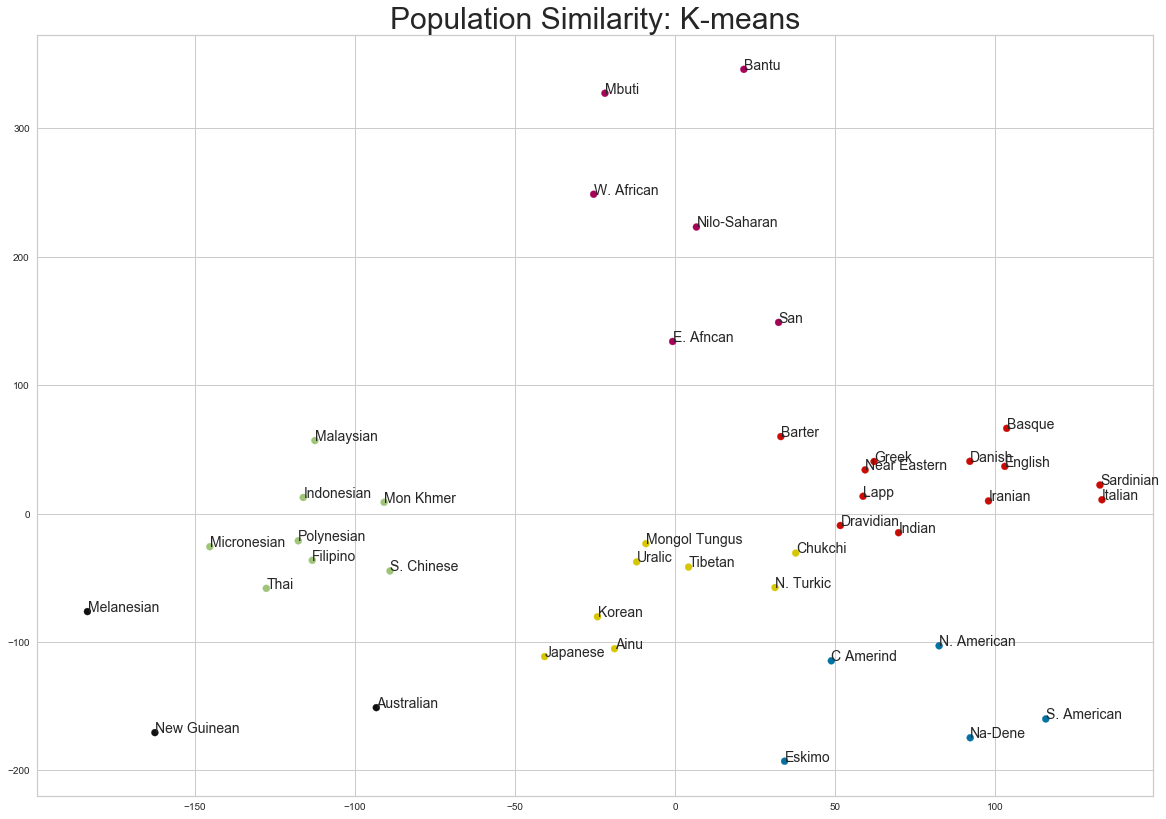

In [12]:
#display the k-means clustering with color coding for each of the unique labels
fig = plt.figure(figsize=(20,14))
plt.scatter(x,y, c = class_colors)
plt.title("Population Similarity: K-means", fontsize = 30)

for i, text in enumerate(population_labels):
    plot_text = plt.annotate(text, (x[i]+.03, y[i]+.03))
    plot_text.set_fontsize(14)

C:\Users\bkado\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


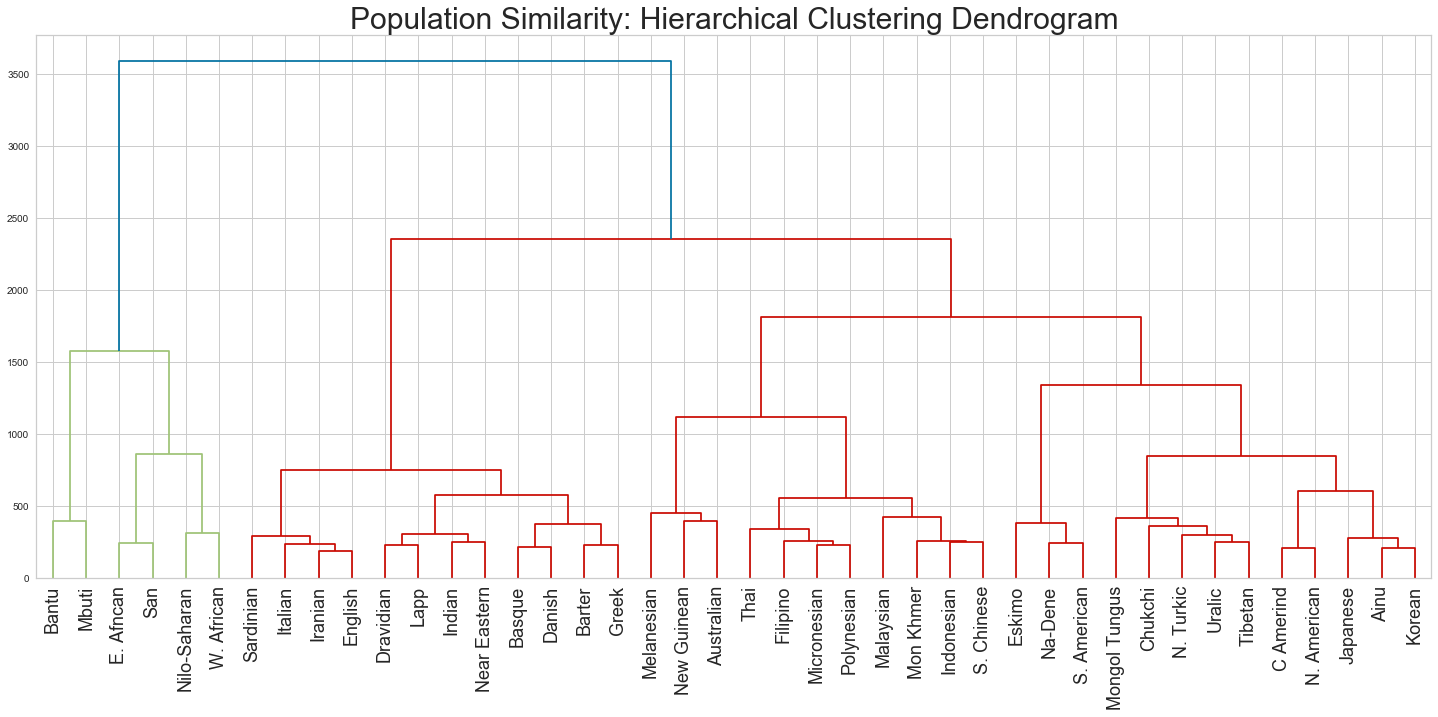

In [13]:
#create a dendrogram of the data matrix
dendro_linkage = linkage(data['D'], 'ward')
fig = plt.figure(figsize=(25, 10))
plt.title("Population Similarity: Hierarchical Clustering Dendrogram", fontsize = 30)
dendro = dendrogram(dendro_linkage, labels = population_labels, leaf_font_size = 18)

In [14]:
#flatten the hierarchical clustering and color code the labels 
f_cluster = fcluster(dendro_linkage, t=num_clusters, criterion='maxclust')

class_colors = f_cluster
class_colors = np.where(class_colors == 1, 'r', class_colors)
class_colors = np.where(class_colors == '2', 'g', class_colors)
class_colors = np.where(class_colors == '3', 'b', class_colors)
class_colors = np.where(class_colors == '4', 'y', class_colors)
class_colors = np.where(class_colors == '5', 'm', class_colors)
class_colors = np.where(class_colors == '6', 'k', class_colors)
#class_colors = np.where(class_colors == '7', 'c', class_colors)

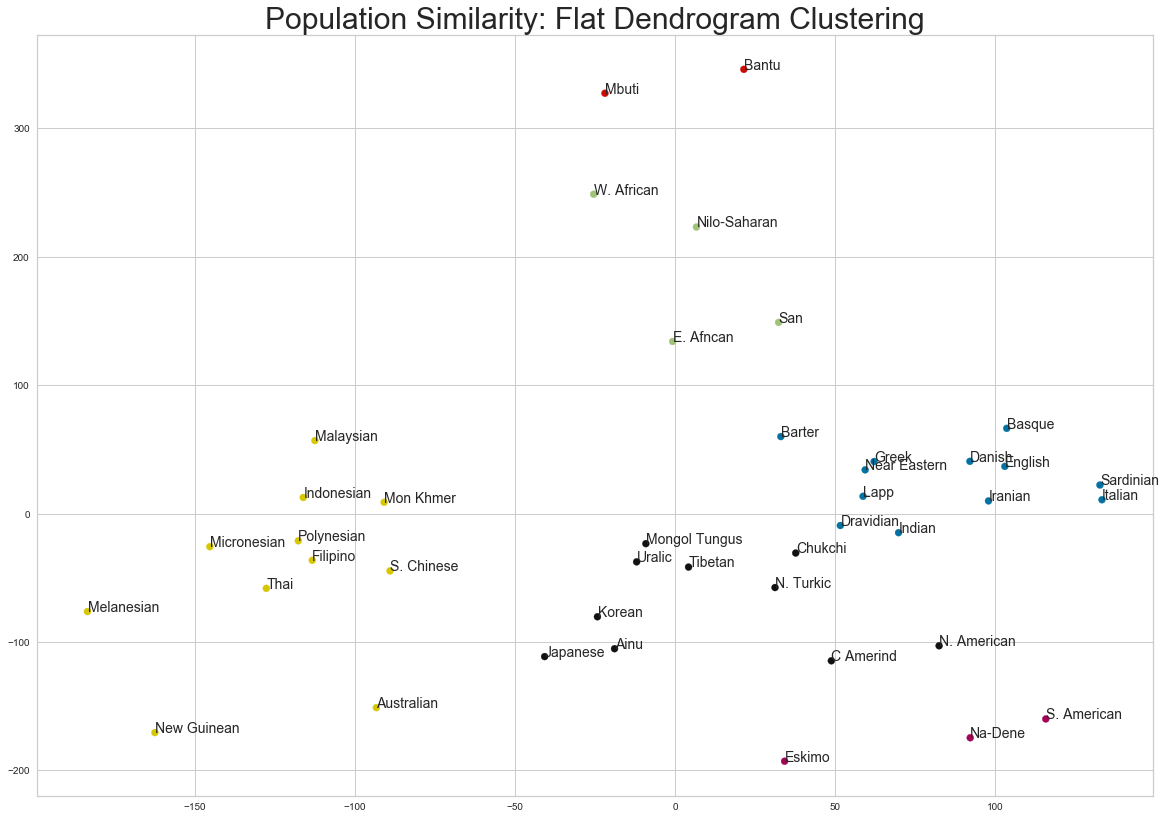

In [15]:
#display a plot of the flattened clustering
fig = plt.figure(figsize=(20,14))
plt.scatter(x,y, c = class_colors)
plt.title("Population Similarity: Flat Dendrogram Clustering", fontsize = 30)

for i, text in enumerate(population_labels):
    plot_text = plt.annotate(text, (x[i]+.03, y[i]+.03))
    plot_text.set_fontsize(14)

In [16]:
#use kmedoids to cluster the data matrix
kmedoids = KMedoids(n_clusters=num_clusters, random_state=0).fit(data['D'])

class_colors = kmedoids.labels_
class_colors = np.where(class_colors == 0, 'r', class_colors)
class_colors = np.where(class_colors == '1', 'g', class_colors)
class_colors = np.where(class_colors == '2', 'b', class_colors)
class_colors = np.where(class_colors == '3', 'y', class_colors)
class_colors = np.where(class_colors == '4', 'm', class_colors)
class_colors = np.where(class_colors == '5', 'k', class_colors)
#class_colors = np.where(class_colors == '6', 'c', class_colors)

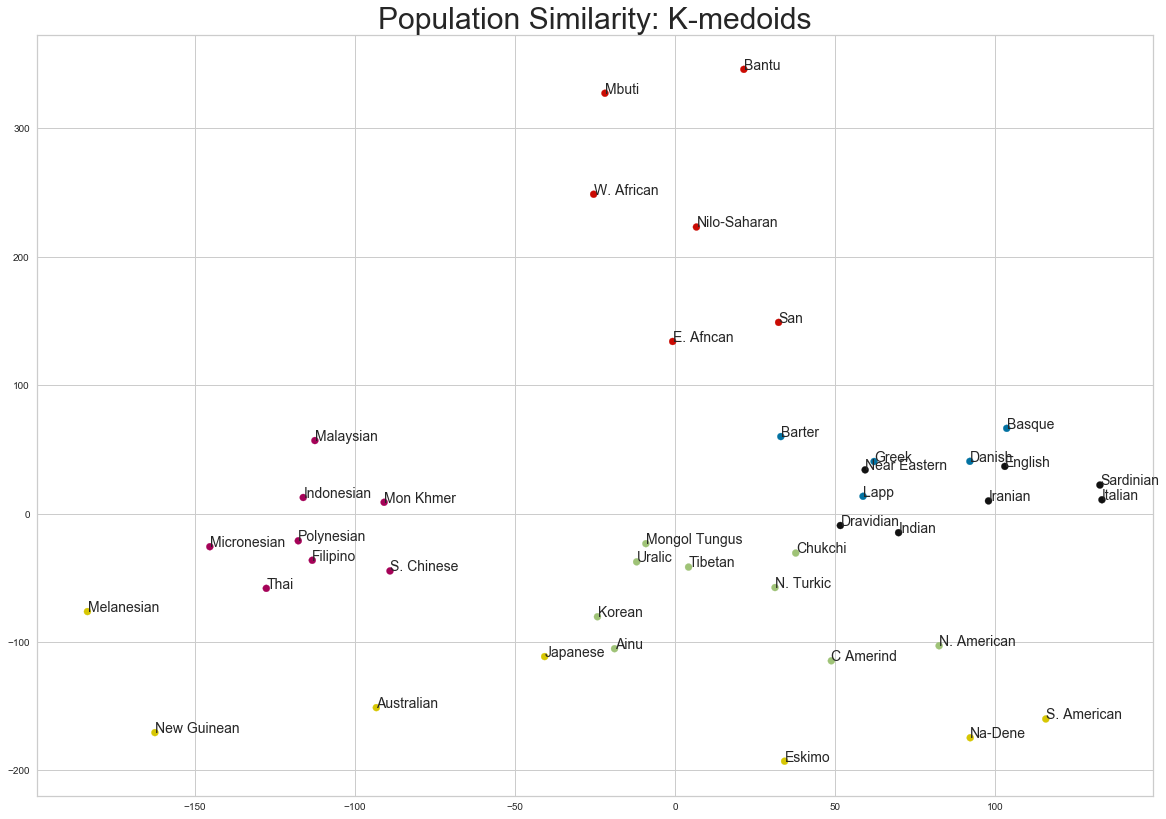

In [17]:
#display kmedoids clustering with color coding
fig = plt.figure(figsize=(20,14))
plt.scatter(x,y, c = class_colors )
plt.title("Population Similarity: K-medoids", fontsize = 30)

for i, text in enumerate(population_labels):
    plot_text = plt.annotate(text, (x[i]+.03, y[i]+.03))
    plot_text.set_fontsize(14)